In [452]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns

In [453]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [454]:
import pandas as pd
train=pd.read_csv('train_1.csv')

In [455]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [456]:
train.shape

(145063, 551)

Text(0, 0.5, 'Total Page Viewers')

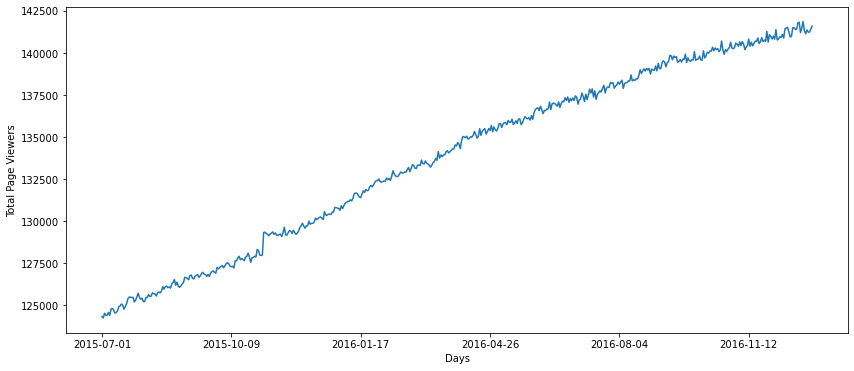

In [457]:
plot.figure(figsize=(14,6))
train.groupby('Page').count().sum().plot()
plot.xlabel('Days')
plot.ylabel('Total Page Viewers')

Text(0, 0.5, 'Null Value Count')

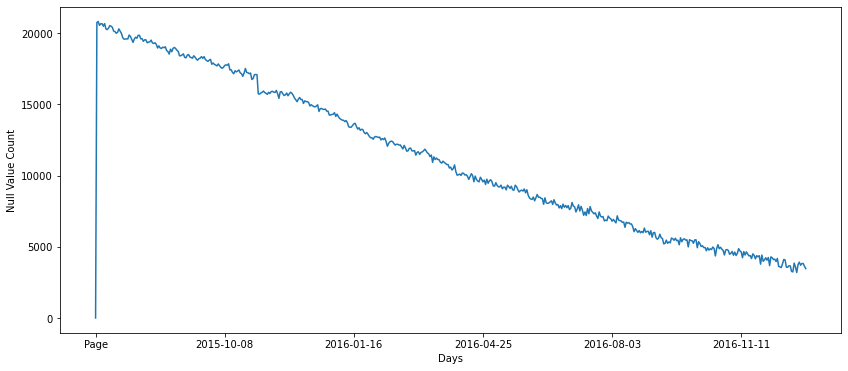

In [458]:
plot.figure(figsize=(14,6))
train.isnull().sum().plot()
plot.xlabel('Days')
plot.ylabel('Null Value Count')

The page values are in this format

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACESS TYPE _ ACCESS ORIGIN

having information about page name, the main domain, device type used to access the page, and also the request origin(spider or browser agent)

In [459]:
train=train.dropna()
print(train.shape)


(117277, 551)


In [460]:
train

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
144945,Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
144946,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
144947,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,13.0,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0


In [461]:
train.isnull().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

In [462]:
def split_page(page):
  w = re.split('_|\.', page)

  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(train.Page.apply(split_page))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

In [463]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,A'N'D,zh,all-access,spider


<AxesSubplot:xlabel='Language', ylabel='count'>

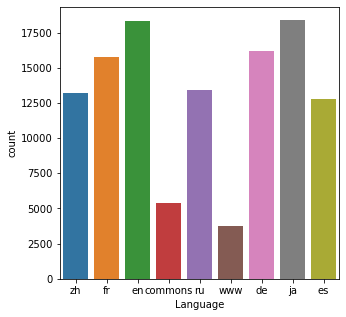

In [464]:
sns.countplot(df['Language'])

<AxesSubplot:xlabel='Access_type', ylabel='count'>

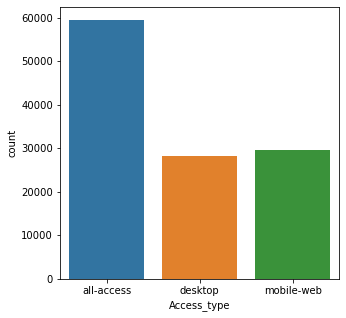

In [465]:
sns.countplot(df['Access_type'])

<AxesSubplot:xlabel='Access_origin', ylabel='count'>

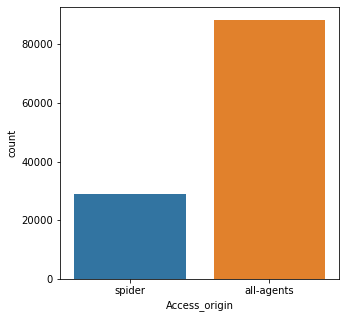

In [466]:
sns.countplot(df['Access_origin'])

In [467]:
df_language=df.groupby('Language').mean().transpose()
df_language

Language,commons,de,en,es,fr,ja,ru,www,zh
2015-07-01,784.666749,3593.570587,1808.990479,2203.801936,1277.881677,724.628605,794.897148,316.071365,234.158043
2015-07-02,790.733646,3574.372738,1853.376102,2187.763135,1267.320168,693.045729,807.991468,302.311627,229.063927
2015-07-03,706.260676,3365.083988,1682.927923,2201.506049,1212.735681,655.538258,731.287284,298.075230,226.159498
2015-07-04,682.223648,3430.775350,1742.532460,2422.735050,1250.860461,597.986656,677.199977,291.967588,243.926162
2015-07-05,714.148852,3565.682485,1788.185623,2482.700225,1309.556226,657.521857,724.892122,330.404103,240.909521
...,...,...,...,...,...,...,...,...,...
2016-12-27,1480.284374,5006.034141,2639.270160,3277.553578,2232.490818,772.610953,1062.835671,617.168005,345.802037
2016-12-28,1442.832140,4908.252048,2557.907604,3120.751469,2145.797820,809.203558,991.616293,585.168897,366.291261
2016-12-29,1398.192545,5206.969443,2614.396166,3468.266937,2167.635975,726.836264,1015.765895,610.052632,371.640993
2016-12-30,1044.558134,4407.816490,2397.786326,2821.105254,1805.536101,637.518313,934.670173,540.952721,347.768300


Text(0, 0.5, 'Views per Page')

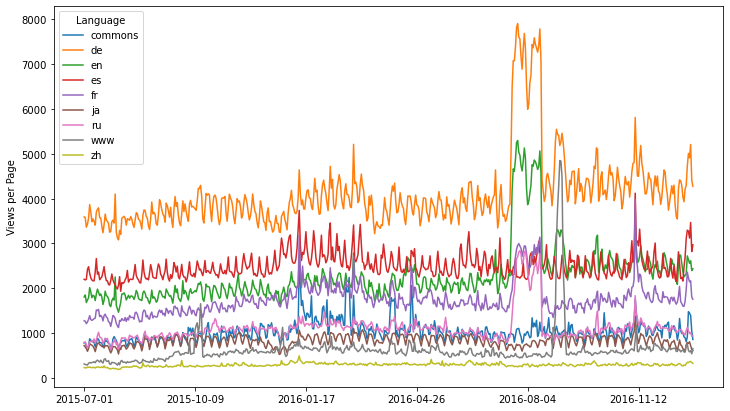

In [468]:
df_language.plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [469]:
df_Access_type=df.groupby('Access_type').mean().transpose()
df_Access_type

Access_type,all-access,desktop,mobile-web
2015-07-01,1575.705453,1365.859039,1343.615594
2015-07-02,1586.237099,1356.631234,1320.350372
2015-07-03,1497.597219,1247.214850,1292.844699
2015-07-04,1521.964925,1271.856556,1370.346038
2015-07-05,1580.575985,1309.901693,1438.713448
...,...,...,...
2016-12-27,2184.578478,1921.720921,2225.165583
2016-12-28,2136.389456,1895.845949,2116.023709
2016-12-29,2239.677427,1919.933785,2214.143828
2016-12-30,1876.820778,1763.349718,1869.386063


Text(0, 0.5, 'Access type per Page')

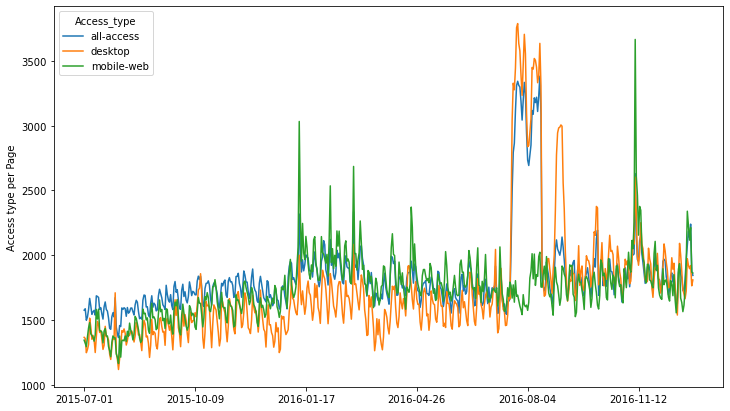

In [470]:
df_Access_type.plot(figsize=(12,7))
plot.ylabel('Access type per Page')

In [471]:
df_Access_origin=df.groupby('Access_origin').mean().transpose()
df_Access_origin

Access_origin,all-agents,spider
2015-07-01,1260.932935,2016.691011
2015-07-02,1252.456548,2028.978586
2015-07-03,1191.695739,1904.594527
2015-07-04,1234.020360,1930.962365
2015-07-05,1282.287309,2008.310467
...,...,...
2016-12-27,1792.617869,3042.231282
2016-12-28,1749.666225,2942.422133
2016-12-29,1813.436381,3076.827087
2016-12-30,1558.612050,2623.572633


Text(0, 0.5, 'Access Origin per Page')

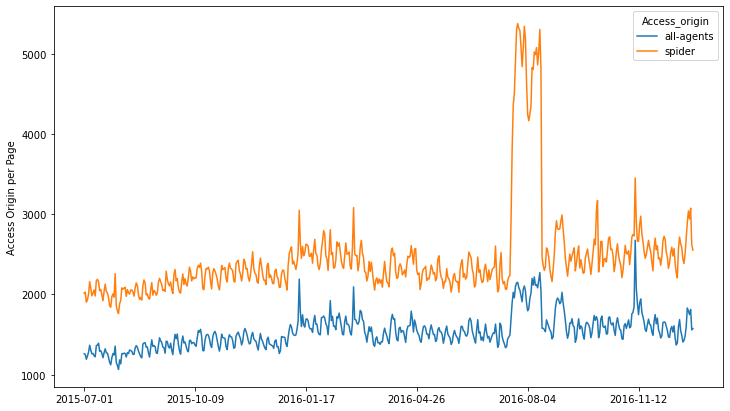

In [472]:
df_Access_origin.plot(figsize=(12,7))
plot.ylabel('Access Origin per Page')

# Checking the stationarity 

Dickey-Fuller test

**Here the null hypothesis is that the TS is non-stationary**: 
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.


In [473]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    for i in x.columns:
        
        result=adfuller(x[i])
        print('---------------------------------------------------------------')
        print(i)
        print('ADF Stastistic: %f'%result[0])
        print('p-value: %f'%result[1])
        if result[1]>0.05:
            print('Series is Non Stationary for '+ i)
        else:
            print('Series is Stationary for '+ i)
            
df_test(df_language)

---------------------------------------------------------------
commons
ADF Stastistic: -2.395440
p-value: 0.143028
Series is Non Stationary for commons
---------------------------------------------------------------
de
ADF Stastistic: -2.899505
p-value: 0.045406
Series is Stationary for de
---------------------------------------------------------------
en
ADF Stastistic: -2.663013
p-value: 0.080660
Series is Non Stationary for en
---------------------------------------------------------------
es
ADF Stastistic: -3.042648
p-value: 0.031099
Series is Stationary for es
---------------------------------------------------------------
fr
ADF Stastistic: -3.983889
p-value: 0.001497
Series is Stationary for fr
---------------------------------------------------------------
ja
ADF Stastistic: -3.229425
p-value: 0.018343
Series is Stationary for ja
---------------------------------------------------------------
ru
ADF Stastistic: -4.221435
p-value: 0.000606
Series is Stationary for ru
---------

In [474]:
def df_test(x):
    for i in x.columns:
        
        result=adfuller(x[i])
        print('---------------------------------------------------------------')
        print(i)
        print('ADF Stastistic: %f'%result[0])
        print('p-value: %f'%result[1])
        if result[1]>0.05:
            print('Series is Non Stationary for '+ i)
        else:
            print('Series is Stationary for '+ i)
            
df_test(df_Access_type)

---------------------------------------------------------------
all-access
ADF Stastistic: -3.413821
p-value: 0.010497
Series is Stationary for all-access
---------------------------------------------------------------
desktop
ADF Stastistic: -2.330413
p-value: 0.162347
Series is Non Stationary for desktop
---------------------------------------------------------------
mobile-web
ADF Stastistic: -2.363759
p-value: 0.152228
Series is Non Stationary for mobile-web


In [475]:
def df_test(x):
    for i in x.columns:
        
        result=adfuller(x[i])
        print('---------------------------------------------------------------')
        print(i)
        print('ADF Stastistic: %f'%result[0])
        print('p-value: %f'%result[1])
        if result[1]>0.05:
            print('Series is Non Stationary for '+ i)
        else:
            print('Series is Stationary for '+ i)
            
df_test(df_Access_origin)

---------------------------------------------------------------
all-agents
ADF Stastistic: -2.593685
p-value: 0.094309
Series is Non Stationary for all-agents
---------------------------------------------------------------
spider
ADF Stastistic: -3.440113
p-value: 0.009665
Series is Stationary for spider


## Smoothing Methods

In [510]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

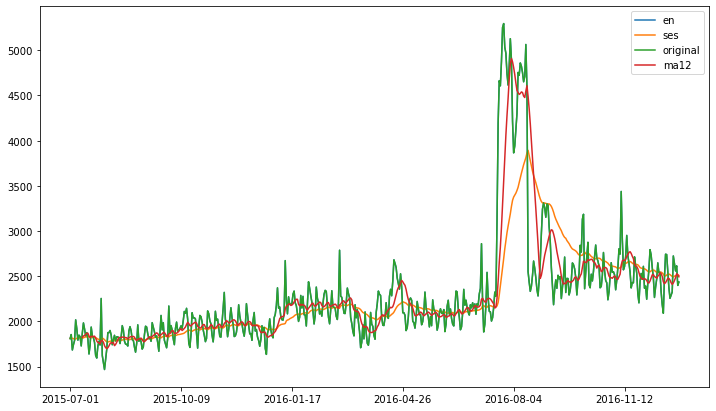

In [477]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(df_language.en).fit(smoothing_level=1/(2*12)).fittedvalues)
df_language.en.plot(figsize=(12,7))
pred.plot(label='ses')
df_language.en.plot(label='original')
df_language.en.rolling(12).mean().plot(label='ma12')
plot.legend()

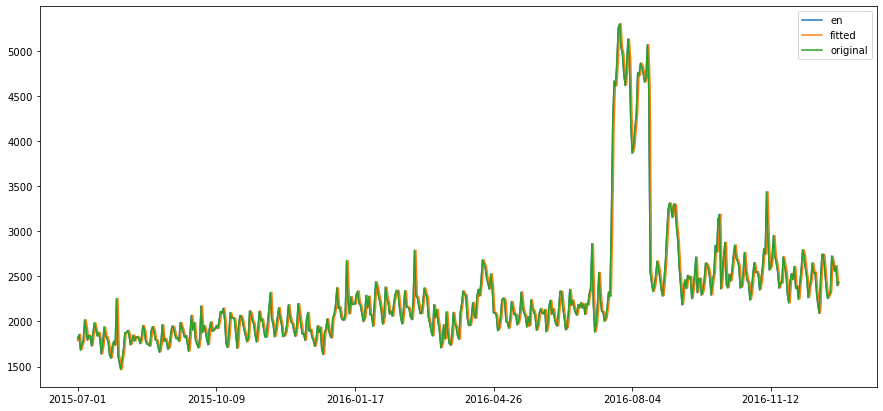

In [478]:
model = sm.tsa.ExponentialSmoothing(df_language.en, trend='add').fit()
df_language.en.plot(figsize=(15,7))
model.fittedvalues.plot(label='fitted')
df_language.en.plot(label='original')
plot.legend()

In [502]:
train_x = df_language.loc[df_language.en.index < df_language.en.index[-20]].copy()
test_x = df_language.loc[df_language.en.index >= df_language.en.index[-20]].copy()


## Simple Exponential smoothing forcast

MAE : 158.263
RMSE : 184.583
MAPE: 0.065


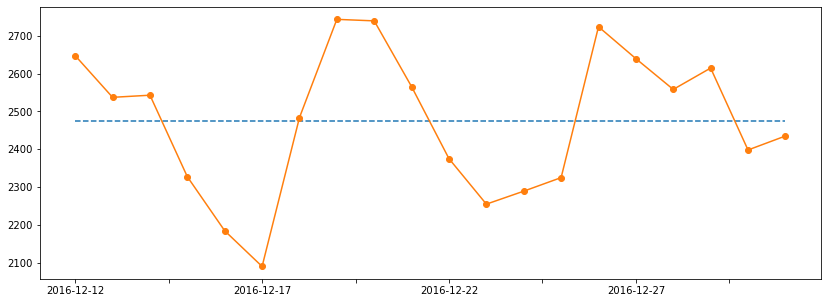

In [515]:
model = sm.tsa.ExponentialSmoothing(train_x.en).fit(smoothing_level=1/(.5*12))
test_x['pred'] = model.forecast(steps=20)
plot.figure(figsize=(14, 5))
test_x.pred.plot(style='--')
test_x.en.plot(style='-o')
performance(test_x['en'], test_x['pred'])

## Double Exponential smoothing forcast

MAE : 158.326
RMSE : 194.195
MAPE: 0.067


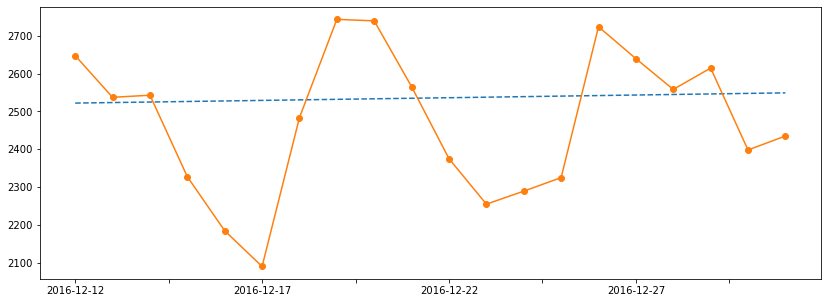

In [517]:
model = sm.tsa.ExponentialSmoothing(train_x.en,trend='mul').fit(smoothing_level=1/(1*12))
test_x['pred'] = model.forecast(steps=20)
plot.figure(figsize=(14, 5))
test_x.pred.plot(style='--')
test_x.en.plot(style='-o')
performance(test_x['en'], test_x['pred'])

## Triple Exponential smoothing forcast

MAE : 88.628
RMSE : 117.301
MAPE: 0.038


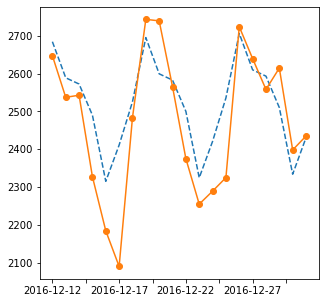

In [520]:
model = sm.tsa.ExponentialSmoothing(train_x.en, trend='mul', seasonal='mul').fit(smoothing_level=1/(.5*12))
test_x['pred'] = model.forecast(steps=20)
test_x.pred.plot(style='--')
test_x.en.plot(style='-o')
performance(test_x['en'], test_x['pred'])